In [228]:
import numpy as np
import pandas as pd
import seaborn as sns

In [133]:
df = pd.read_csv('../Data/fake_reg.csv')

In [134]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


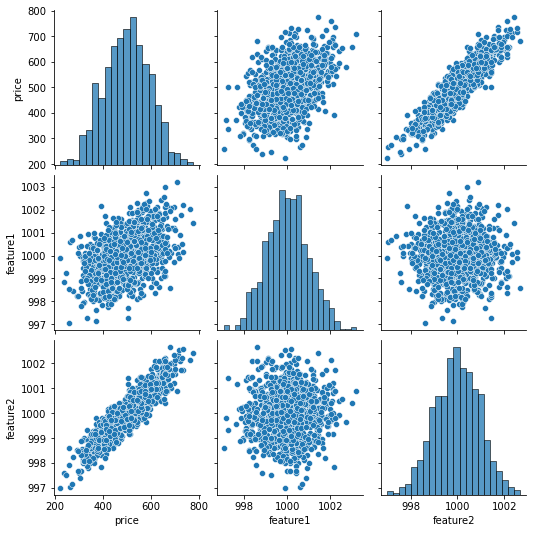

In [135]:
sns.pairplot(df)

In [136]:
from sklearn.model_selection import train_test_split

In [137]:
X = df[['feature1', 
        'feature2']].values

In [138]:
y = df['price'].values

In [175]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [176]:
X_train.shape

(700, 2)

In [177]:
X_test.shape

(300, 2)

In [178]:
from sklearn.preprocessing import MinMaxScaler

In [179]:
scaler = MinMaxScaler()

In [180]:
scaler.fit(X_train)

MinMaxScaler()

In [181]:
X_train = scaler.transform(X_train)

In [182]:
X_test = scaler.transform(X_test)

In [183]:
from tensorflow.keras import Sequential

In [184]:
from tensorflow.keras.layers import Dense

In [185]:
#help(Sequential)

In [186]:
#model = Sequential([Dense(32, activation='relu'), Dense(64, activation='relu'), Dense(1)])

In [187]:
model = Sequential()

In [188]:
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1))

model.compile(optimizer = 'Adam', loss = 'mse')

In [195]:
model.fit(x = X_train, y = y_train, epochs = 100, verbose = 0)

In [196]:
loss_df = pd.DataFrame(model.history.history)

In [197]:
loss_df

,loss
0,24.098835
1,24.394460
2,24.326995
3,24.024446
4,24.094492
...,...
95,23.991877
96,23.837246
97,24.286436
98,23.982067


<AxesSubplot:>

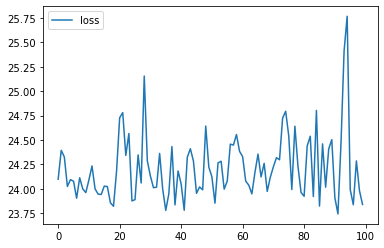

In [198]:
loss_df.plot()

In [199]:
model.evaluate(X_test, y_test, verbose = 0)

25.061591415405275

In [200]:
test_predictions = model.predict(X_test)

In [201]:
test_predictions

array([[405.42978],
       [623.85645],
       [592.4223 ],
       [572.50354],
       [366.72922],
       [579.46094],
       [515.28546],
       [459.28983],
       [549.5039 ],
       [447.69235],
       [612.09314],
       [549.1984 ],
       [419.25156],
       [409.01376],
       [651.5773 ],
       [437.4643 ],
       [508.6728 ],
       [660.2815 ],
       [662.9337 ],
       [565.806  ],
       [334.3123 ],
       [445.00632],
       [382.6497 ],
       [378.87354],
       [566.8664 ],
       [610.9009 ],
       [532.63464],
       [428.01846],
       [655.7896 ],
       [414.22733],
       [442.80527],
       [485.33295],
       [438.58127],
       [682.21454],
       [424.9114 ],
       [417.83823],
       [502.14188],
       [550.73315],
       [509.96152],
       [395.49313],
       [618.9037 ],
       [416.7768 ],
       [604.7505 ],
       [446.13052],
       [502.20792],
       [581.9951 ],
       [669.3522 ],
       [490.61072],
       [318.64734],
       [485.63303],


In [216]:
pred_df = pd.DataFrame(y_test,columns=['Test Y'])

In [217]:
test_predictions = pd.Series(test_predictions.reshape(300,))

In [218]:
pred_df = pd.concat([pred_df,test_predictions],axis=1)

In [219]:
pred_df.columns = ['Test Y','Model Predictions']
pred_df

,Test Y,Model Predictions
0,402.296319,405.429779
1,624.156198,623.856445
2,582.455066,592.422302
3,578.588606,572.503540
4,371.224104,366.729218
...,...,...
295,525.704657,529.287048
296,502.909473,515.567078
297,612.727910,609.956787
298,417.569725,417.102692


<AxesSubplot:xlabel='Test Y', ylabel='Model Predictions'>

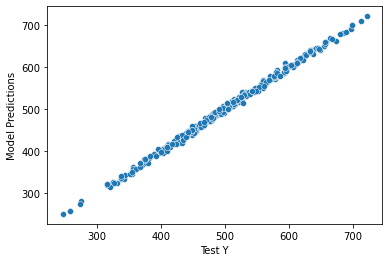

In [220]:
sns.scatterplot(x='Test Y',y='Model Predictions',data=pred_df)

In [222]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [225]:
mean_absolute_error(pred_df['Test Y'], pred_df['Model Predictions'])

4.01231884531253

In [229]:
np.sqrt(mean_squared_error(pred_df['Test Y'], pred_df['Model Predictions']))

5.006155633058358

In [230]:
df.describe()

,price,feature1,feature2
count,1000.000000,1000.000000,1000.000000
mean,498.673029,1000.014171,999.979847
std,93.785431,0.974018,0.948330
min,223.346793,997.058347,996.995651
25%,433.025732,999.332068,999.316106
50%,502.382117,1000.009915,1000.002243
75%,564.921588,1000.637580,1000.645380
max,774.407854,1003.207934,1002.666308


In [231]:
new_item = [[998, 1000]]

In [233]:
new_item = scaler.transform(new_item)

In [234]:
model.predict(new_item)

array([[419.842]], dtype=float32)

In [235]:
from tensorflow.keras.models import load_model

In [236]:
model.save('price_model.h5')

In [237]:
later_model = load_model('my_model.h5')

AttributeError: 'str' object has no attribute 'decode'